In [1]:
!pip install darts

In [2]:
from darts import TimeSeries
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

In [3]:
from darts.models import BlockRNNModel
from darts.models import RNNModel
from darts import TimeSeries
# from darts.metrics import mape, mase, rmse, mae, smape
# from darts.utils.likelihood_models import GaussianLikelihood

In [4]:
# import data

data = pd.read_csv('/content/Saudi_change_GDP_New_1.csv')
data.head()

,Unnamed: 0,Date,GDP_Change
0,1,2010 Q2,3.126108
1,2,2010 Q3,1.168718
2,3,2010 Q4,5.731740
3,4,2011 Q1,2.803197
4,5,2011 Q2,1.574100


In [5]:
#We only take cases because we want univariate data
test_C = data['GDP_Change']
cases = TimeSeries.from_series(test_C)
#data.plot()
type(cases)
# test_C.head()

darts.timeseries.TimeSeries

In [7]:
train, test = cases[:-6], cases[-6:]
# train_cvt, test_cvt = covariates[:-13], covariates[-13:]

In [8]:
model = RNNModel(input_chunk_length = 10, output_chunk_length=3, model='LSTM', n_epochs=100, hidden_dim=25)
model.fit(train)
pred = model.predict(6)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.8 K 
4 | V             | Linear           | 26    
---------------------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params
0.011     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [9]:
from google.colab import files
pred.to_csv('GDP_6_LSTM.csv', encoding = 'utf-8-sig')
files.download('GDP_6_LSTM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 15.3 MB/s eta 0:00:00


In [11]:
# from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sklearn.svm import SVR
from sktime.forecasting.compose import make_reduction

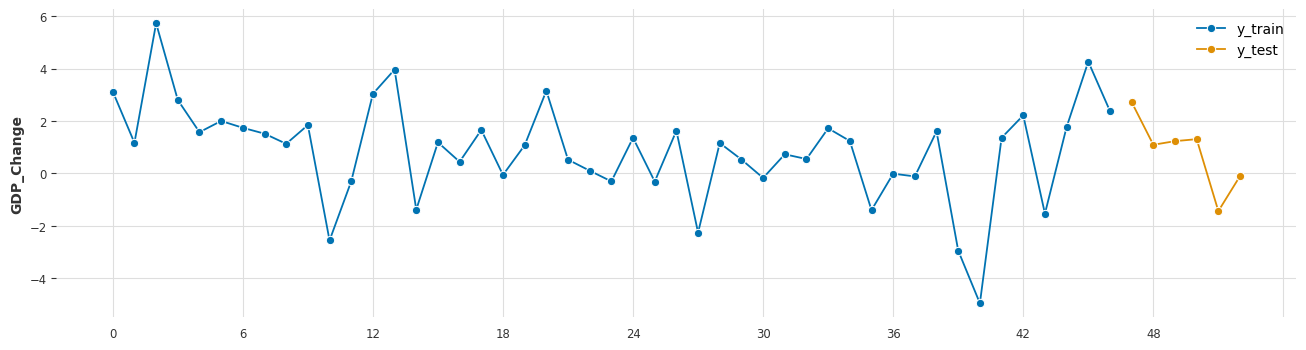

In [13]:
train, test = test_C[:-6], test_C[-6:]
fh = np.arange(1, 6+1)
plot_series(train, test, labels=["y_train", "y_test"]);

In [14]:
# declarative forecaster specification - just two lines!
regressor = SVR(C=1.0, epsilon=0.2)
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
forecaster.fit(train)
pred = forecaster.predict(fh)

In [15]:
pred

47    0.874357
48    0.679455
49    1.104761
50    0.905477
51    0.830199
52    0.523594
Name: GDP_Change, dtype: float64

In [16]:
from google.colab import files
pred.to_csv('GDP_SVR.csv', encoding = 'utf-8-sig')
files.download('GDP_SVR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>